<a href="https://colab.research.google.com/github/garthajon/QuantFinanceIntro/blob/main/52weekGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  20 of 20 completed


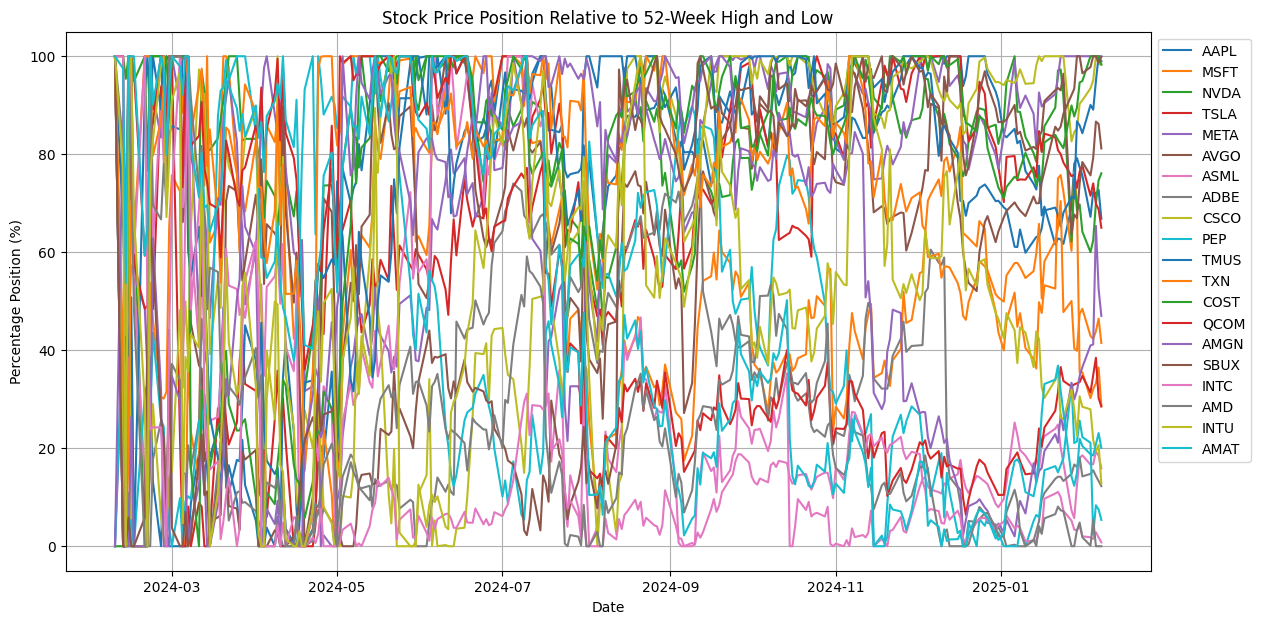

   Ticker  Standard Deviation  Sharpe Ratio
0    AAPL            0.237328      0.901905
1    MSFT            0.213107      0.045274
2    NVDA            0.568619      1.372324
3    TSLA            0.640770      1.313028
4    META            0.304919      1.518874
5    AVGO            0.568775      1.291451
6    ASML            0.451336     -0.309033
7    ADBE            0.362755     -0.820924
8    CSCO            0.183590      1.418379
9     PEP            0.177223     -0.837018
10   TMUS            0.192672      2.347722
11    TXN            0.288748      0.612809
12   COST            0.193508      1.979778
13   QCOM            0.379317      0.548462
14   AMGN            0.258864      0.187617
15   SBUX            0.382413      0.603792
16   INTC            0.510265     -1.308237
17    AMD            0.470495     -0.756380
18   INTU            0.281371     -0.304198
19   AMAT            0.430187      0.292397


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of top 20 NASDAQ tech stock tickers
tickers = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'META', 'AVGO', 'ASML', 'ADBE', 'CSCO', 'PEP',
           'TMUS', 'TXN', 'COST', 'QCOM', 'AMGN', 'SBUX', 'INTC', 'AMD', 'INTU', 'AMAT']

# Define the time period
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(years=1)

# Fetch historical data
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Calculate 52-week high and low
rolling_window = 252  # Number of trading days in a year
rolling_high = data.rolling(window=rolling_window, min_periods=1).max()
rolling_low = data.rolling(window=rolling_window, min_periods=1).min()

# Calculate percentage position within 52-week range
percentage_position = (data - rolling_low) / (rolling_high - rolling_low) * 100

# Plotting
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(percentage_position.index, percentage_position[ticker], label=ticker)
plt.title('Stock Price Position Relative to 52-Week High and Low')
plt.xlabel('Date')
plt.ylabel('Percentage Position (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Calculate Standard Deviation and Sharpe Ratio
risk_free_rate = 0.01  # Example risk-free rate
metrics = []
for ticker in tickers:
    returns = data[ticker].pct_change().dropna()
    std_dev = returns.std() * np.sqrt(252)  # Annualized standard deviation
    sharpe_ratio = (returns.mean() * 252 - risk_free_rate) / std_dev  # Annualized Sharpe Ratio
    metrics.append({'Ticker': ticker, 'Standard Deviation': std_dev, 'Sharpe Ratio': sharpe_ratio})

metrics_df = pd.DataFrame(metrics)
print(metrics_df)
